# 8. Unsupervised Machine Learning - Clustering

## Contents
__Importing libraries__<br>
__Resetting pandas and matplotlib options__<br>
__Definin 'path' variable__<br>
__Importing dataframes__<br>
__Unsupervised machine learning__<br>
- Isolating relevant numeric columns for machine learning
- The elbow technique
- Plotting the elbow curves
- K-means clustering
- Investigating 'kmeans_clusters' flags

__Supervised machine learning - Regression analysis based on the kmeans_clustering__
- Redefining hypothesis based on new correlation matrix for kmeans_cluster - 1
- Reshaping the variables as numpy arrays
- Splitting the data in to train and test set
- Regression analysis
- Interpreting the results of the linear regression

__Future analysis__<br>
__Exporting the flagged dataframe__<br>

## Importing libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

## Resetting pandas and matplotlib options

In [2]:
# enabling maximum column and row display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# ensuring the charts we create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

## Defining 'path' variable

In [3]:
# defining path variable
path = r"C:\Users\khand\Desktop\Careerfoundry\Data Immersion\Achievement - 6\Project - IMF Data Analysis"

## Importing cleaned and perged dataframe

In [4]:
# importing dataframe
df_cpi_pcps = pd.read_csv(os.path.join(path, '2. Data', 'Prepared Data', 'overall_cpi_pcps_merged_flagged_v2_csv.csv'), index_col = None)
df_cpi_pcps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22752 entries, 0 to 22751
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   country_name                              22752 non-null  object 
 1   month_code                                22752 non-null  object 
 2   year                                      22752 non-null  int64  
 3   month_number                              22752 non-null  int64  
 4   consumer_price_index_all_items            22752 non-null  float64
 5   agr_raw_material_index                    22752 non-null  float64
 6   agriculture                               22752 non-null  float64
 7   all_index                                 22752 non-null  float64
 8   all_metals_ex_gold_index                  22752 non-null  float64
 9   all_metals_index                          22752 non-null  float64
 10  apsp_crude_oil_us_dollar_per_bbl  

## Unsupervised machine learning

 ## Creating new dataframe excluding outlier countries

In [5]:
# creating new dataframe excluding outlier countries
df_cpi_pcps_without_outliers = df_cpi_pcps[df_cpi_pcps['outlier_country_flag'] == 'Non-outlier country']
df_cpi_pcps_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13680 entries, 0 to 22463
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   country_name                              13680 non-null  object 
 1   month_code                                13680 non-null  object 
 2   year                                      13680 non-null  int64  
 3   month_number                              13680 non-null  int64  
 4   consumer_price_index_all_items            13680 non-null  float64
 5   agr_raw_material_index                    13680 non-null  float64
 6   agriculture                               13680 non-null  float64
 7   all_index                                 13680 non-null  float64
 8   all_metals_ex_gold_index                  13680 non-null  float64
 9   all_metals_index                          13680 non-null  float64
 10  apsp_crude_oil_us_dollar_per_bbl  

### Isolating relevant numeric columns for machine learning

In [6]:
# isolating numeric variables without outliers
df_num_vars = df_cpi_pcps_without_outliers.iloc[:, 4:23]
df_num_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13680 entries, 0 to 22463
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   consumer_price_index_all_items            13680 non-null  float64
 1   agr_raw_material_index                    13680 non-null  float64
 2   agriculture                               13680 non-null  float64
 3   all_index                                 13680 non-null  float64
 4   all_metals_ex_gold_index                  13680 non-null  float64
 5   all_metals_index                          13680 non-null  float64
 6   apsp_crude_oil_us_dollar_per_bbl          13680 non-null  float64
 7   beverages_index                           13680 non-null  float64
 8   coal_index                                13680 non-null  float64
 9   commodities_for_index_all_excluding_gold  13680 non-null  float64
 10  energy_index                      

### The elbow technique

In [7]:
# applying elbow technique to find optimum number of clusters

# defining the range of potential clusters
num_cl = range(1,10)

# defining k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [8]:
# creating a score that represents a rate of variation for the given cluster option
score_chosen_vars = [kmeans[i].fit(df_num_vars.iloc[:, :2]).score(df_num_vars.iloc[:, :2]) for i in range (len(kmeans))]

### Plotting the elbow curves

C:\Users\khand\AppData\Local\Temp\ipykernel_2800\915276942.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inch" which is no longer supported as of 3.3 and will become an error in 3.6
  pl.savefig(os.path.join(path, '4. Analysis', 'Elbow technique plot.png'), bbox_inch = 'tight')


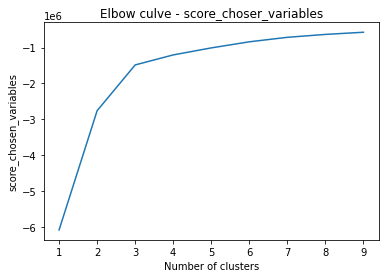

In [9]:
# plotting the elbow curve for chosen variables
pl.plot(num_cl, score_chosen_vars)
pl.xlabel('Number of clusters')
pl.ylabel('score_chosen_variables')
pl.title('Elbow culve - score_choser_variables')
pl.savefig(os.path.join(path, '4. Analysis', 'Elbow technique plot.png'), bbox_inch = 'tight')
pl.show()

Optimum number of clusters based on "score_chosen_vars" is 3

### K-means clustering

In [43]:
# creating k-means objects
kmeans_chosen_vars = KMeans(n_clusters = 3)

In [44]:
# fitting the k-means objects to the data
kmeans_chosen_vars.fit(df_num_vars.iloc[:, :2])

KMeans(n_clusters=3)

In [45]:
# adding the cluster flags as columns in the original dataframe
df_cpi_pcps_without_outliers.loc[:, 'kmeans_clusters'] = kmeans_chosen_vars.fit_predict(df_cpi_pcps_without_outliers.iloc[:, 4:6])

C:\Users\khand\AppData\Local\Temp\ipykernel_2800\3376726747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpi_pcps_without_outliers.loc[:, 'kmeans_clusters'] = kmeans_chosen_vars.fit_predict(df_cpi_pcps_without_outliers.iloc[:, 4:6])


In [46]:
# checking value counts of the new 'cpi_clusters' flag columns
df_cpi_pcps_without_outliers['kmeans_clusters'].value_counts(dropna = False)

1    8364
0    4271
2    1045
Name: kmeans_clusters, dtype: int64

In [47]:
# checking the datatype of the 'kmeans_clusters' column
df_cpi_pcps_without_outliers['kmeans_clusters'].dtype

dtype('int32')

C:\Users\khand\AppData\Local\Temp\ipykernel_2800\1860743346.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inch" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(os.path.join(path, '4. Analysis', 'K-means clusters.png'), bbox_inch = 'tight')


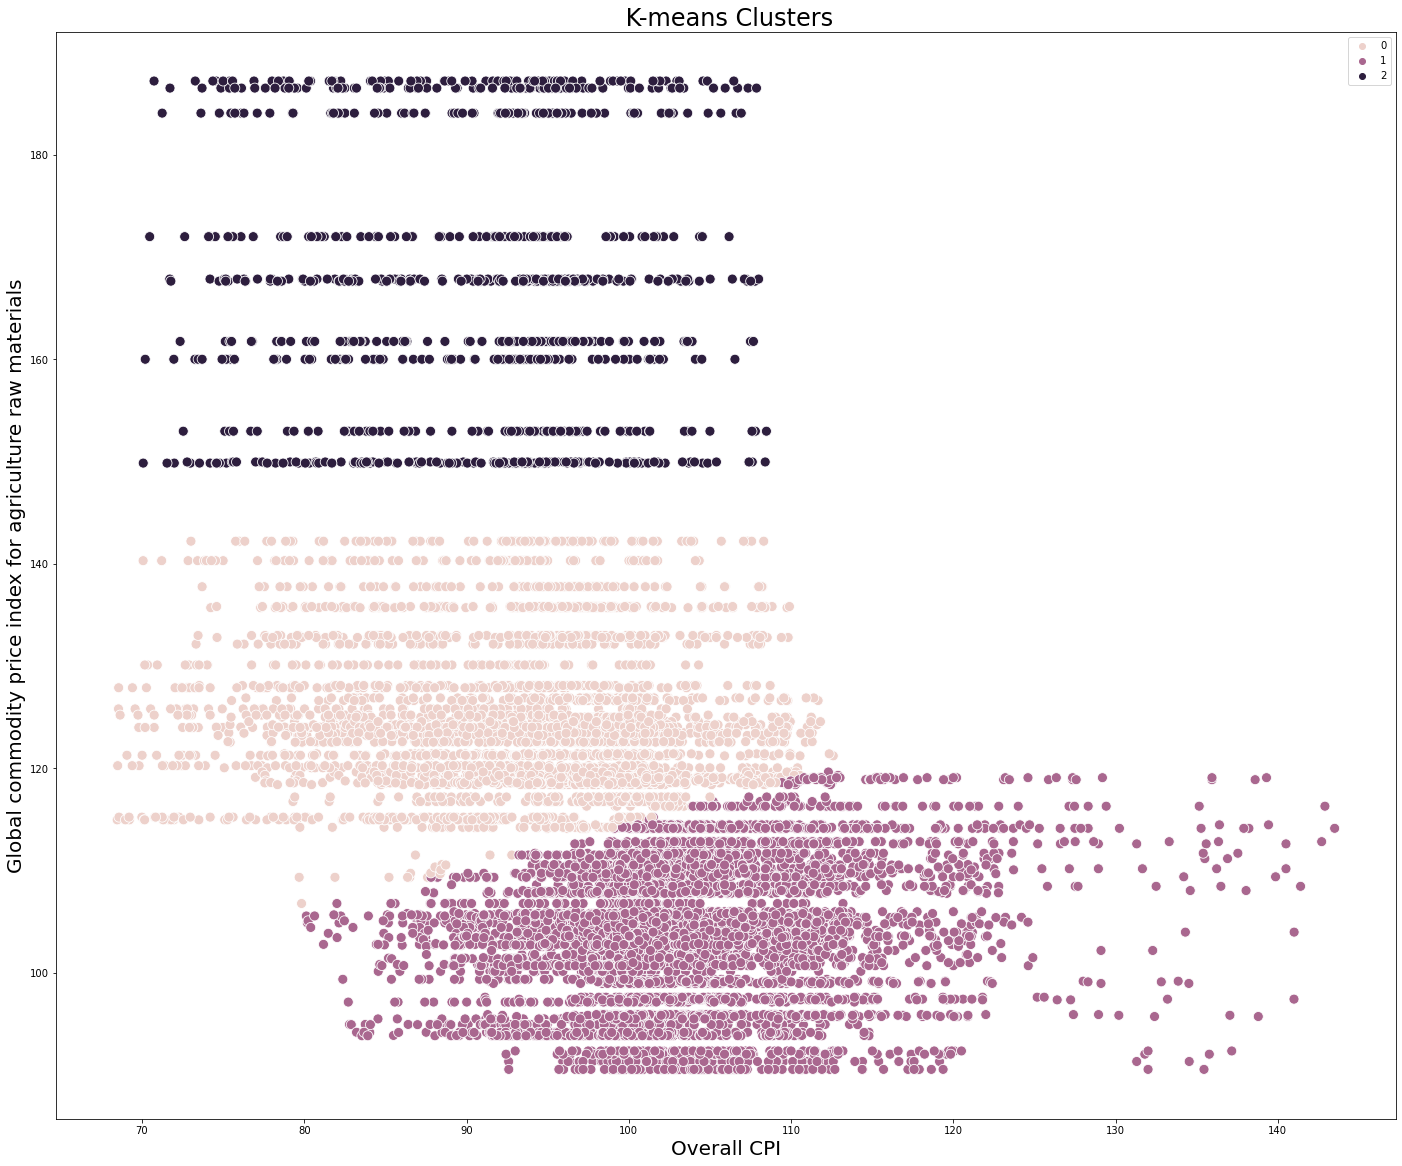

In [48]:
# visualizing the 'kmeans_clusters' flags
plt.figure(figsize = (24,20))
ax = sns.scatterplot(x = df_cpi_pcps_without_outliers['consumer_price_index_all_items'], y = df_cpi_pcps_without_outliers['agr_raw_material_index'], hue = kmeans_chosen_vars.labels_, s = 100)
ax.grid(False)
plt.xlabel('Overall CPI', fontsize = 20)
plt.ylabel('Global commodity price index for agriculture raw materials', fontsize = 20)
plt.title(' K-means Clusters', fontsize = 24)
plt.savefig(os.path.join(path, '4. Analysis', 'K-means clusters.png'), bbox_inch = 'tight')
plt.show()

### Investigating 'kmeans_clusters' flags

In [49]:
# checking year wise 'overal_clusters' flags
overall_clusters_year = pd.crosstab(df_cpi_pcps_without_outliers['year'], df_cpi_pcps_without_outliers['kmeans_clusters']).reset_index().rename_axis(None, axis = 1)
overall_clusters_year

,year,0,1,2
0,2010,948,2,190
1,2011,285,0,855
2,2012,1140,0,0
3,2013,1131,9,0
4,2014,591,549,0
5,2015,0,1140,0
6,2016,0,1140,0
7,2017,4,1136,0
8,2018,6,1134,0
9,2019,0,1140,0


In [50]:
# checking country wise 'overall_clusters' flags
overall_clusters_country = pd.crosstab(df_cpi_pcps_without_outliers['country_name'], df_cpi_pcps_without_outliers['kmeans_clusters']).reset_index().rename_axis(None, axis = 1)
overall_clusters_country

,country_name,0,1,2
0,Albania,47,86,11
1,Antigua and Barbuda,46,87,11
2,Austria,46,87,11
3,"Bahamas, The",43,90,11
4,"Bahrain, Kingdom of",50,83,11
5,Belgium,43,90,11
6,Belize,46,87,11
7,Benin,45,88,11
8,Bolivia,46,87,11
9,Bosnia and Herzegovina,45,88,11


In [51]:
# checking summary statistics of 'ovarall flags'
df_cpi_pcps_without_outliers.groupby('kmeans_clusters').agg({'consumer_price_index_all_items' : ['min', 'max', 'mean', 'median', 'count'],
                                                             'agr_raw_material_index' : ['min', 'max', 'mean', 'median', 'count']})

consumer_price_index_all_items                      \
                                           min     max        mean   
kmeans_clusters                                                      
0                                    68.470000  112.60   94.192409   
1                                    80.125822  143.50  103.076260   
2                                    70.074135  108.48   91.133428   

                                  agr_raw_material_index              \
                     median count                    min         max   
kmeans_clusters                                                        
0                 95.980327  4271             106.782997  142.207266   
1                101.764109  8364              90.561779  119.642447   
2                 93.324794  1045             149.846020  187.205271   

                                               
                       mean      median count  
kmeans_clusters                                
0                124.323519  123.432004  4271  
1                103.688597  103.608780  8364  
2                167.250661  167.634356  1045

## Interpreting the 'kmeans_clusters' flags
The clusters represent the changes in the chosen variables over the years.
- The kmeans_cluster: 1 mostly represents the values from year 2015-2021

## Supervised machine learning - Regression analysis based on the kmeans_clustering

In [52]:
# importing required libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
# isolating the records belonging to kmeans_cluster - 1
df_cluster_1 = df_cpi_pcps_without_outliers[df_cpi_pcps_without_outliers['kmeans_clusters'] == 1]
df_cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8364 entries, 55 to 22463
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   country_name                              8364 non-null   object 
 1   month_code                                8364 non-null   object 
 2   year                                      8364 non-null   int64  
 3   month_number                              8364 non-null   int64  
 4   consumer_price_index_all_items            8364 non-null   float64
 5   agr_raw_material_index                    8364 non-null   float64
 6   agriculture                               8364 non-null   float64
 7   all_index                                 8364 non-null   float64
 8   all_metals_ex_gold_index                  8364 non-null   float64
 9   all_metals_index                          8364 non-null   float64
 10  apsp_crude_oil_us_dollar_per_bbl  

In [54]:
# correlation matrix
df_cluster_1.iloc[:, 4:23].corr()

,consumer_price_index_all_items,agr_raw_material_index,agriculture,all_index,all_metals_ex_gold_index,all_metals_index,apsp_crude_oil_us_dollar_per_bbl,beverages_index,coal_index,commodities_for_index_all_excluding_gold,energy_index,fertilizer,food_and_beverage_index,food_index,industrial_materials_index,metal_index,natural_gas_index,non_fuel_index,precious_metals_price_index
consumer_price_index_all_items,1.000000,0.181411,0.255175,0.264185,0.402424,0.423654,0.123788,-0.081630,0.284375,0.234077,0.160082,0.178733,0.257047,0.279656,0.391212,0.397615,0.147309,0.386255,0.403097
agr_raw_material_index,0.181411,1.000000,0.803432,0.781149,0.624840,0.493466,0.673070,0.326767,0.633554,0.787872,0.729917,0.477032,0.767496,0.779689,0.691866,0.649637,0.575362,0.651723,0.201005
agriculture,0.255175,0.803432,1.000000,0.873942,0.794141,0.716085,0.560306,0.605012,0.676421,0.855895,0.733865,0.714356,0.998312,0.996723,0.825175,0.805502,0.742402,0.887304,0.489231
all_index,0.264185,0.781149,0.873942,1.000000,0.760022,0.651983,0.838530,0.490820,0.776254,0.996101,0.950337,0.782295,0.864761,0.866609,0.800972,0.781775,0.830744,0.803882,0.375782
all_metals_ex_gold_index,0.402424,0.624840,0.794141,0.760022,1.000000,0.973887,0.441414,0.130789,0.597675,0.708737,0.533608,0.533683,0.794088,0.826802,0.995002,0.998401,0.464243,0.971542,0.805156
all_metals_index,0.423654,0.493466,0.716085,0.651983,0.973887,1.000000,0.288339,0.068179,0.516562,0.586071,0.393883,0.459754,0.722861,0.757573,0.950122,0.961504,0.379633,0.955503,0.918410
apsp_crude_oil_us_dollar_per_bbl,0.123788,0.673070,0.560306,0.838530,0.441414,0.288339,1.000000,0.288410,0.553041,0.867195,0.924435,0.517042,0.537617,0.540388,0.499088,0.472434,0.571410,0.430316,-0.016220
beverages_index,-0.081630,0.326767,0.605012,0.490820,0.130789,0.068179,0.288410,1.000000,0.312504,0.510743,0.510306,0.667869,0.619532,0.557995,0.160264,0.142981,0.715257,0.310736,-0.048860
coal_index,0.284375,0.633554,0.676421,0.776254,0.597675,0.516562,0.553041,0.312504,1.000000,0.771894,0.734717,0.599740,0.666491,0.674292,0.638736,0.622590,0.752199,0.629723,0.293132
commodities_for_index_all_excluding_gold,0.234077,0.787872,0.855895,0.996101,0.708737,0.586071,0.867195,0.510743,0.771894,1.000000,0.971357,0.781342,0.844674,0.843442,0.756152,0.734053,0.839505,0.753494,0.292713


C:\Users\khand\AppData\Local\Temp\ipykernel_2800\2588523299.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inch" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(os.path.join(path, '4. Analysis', 'Correlation matrix Kmeans cluster 1.png'), bbox_inch = 'tight')


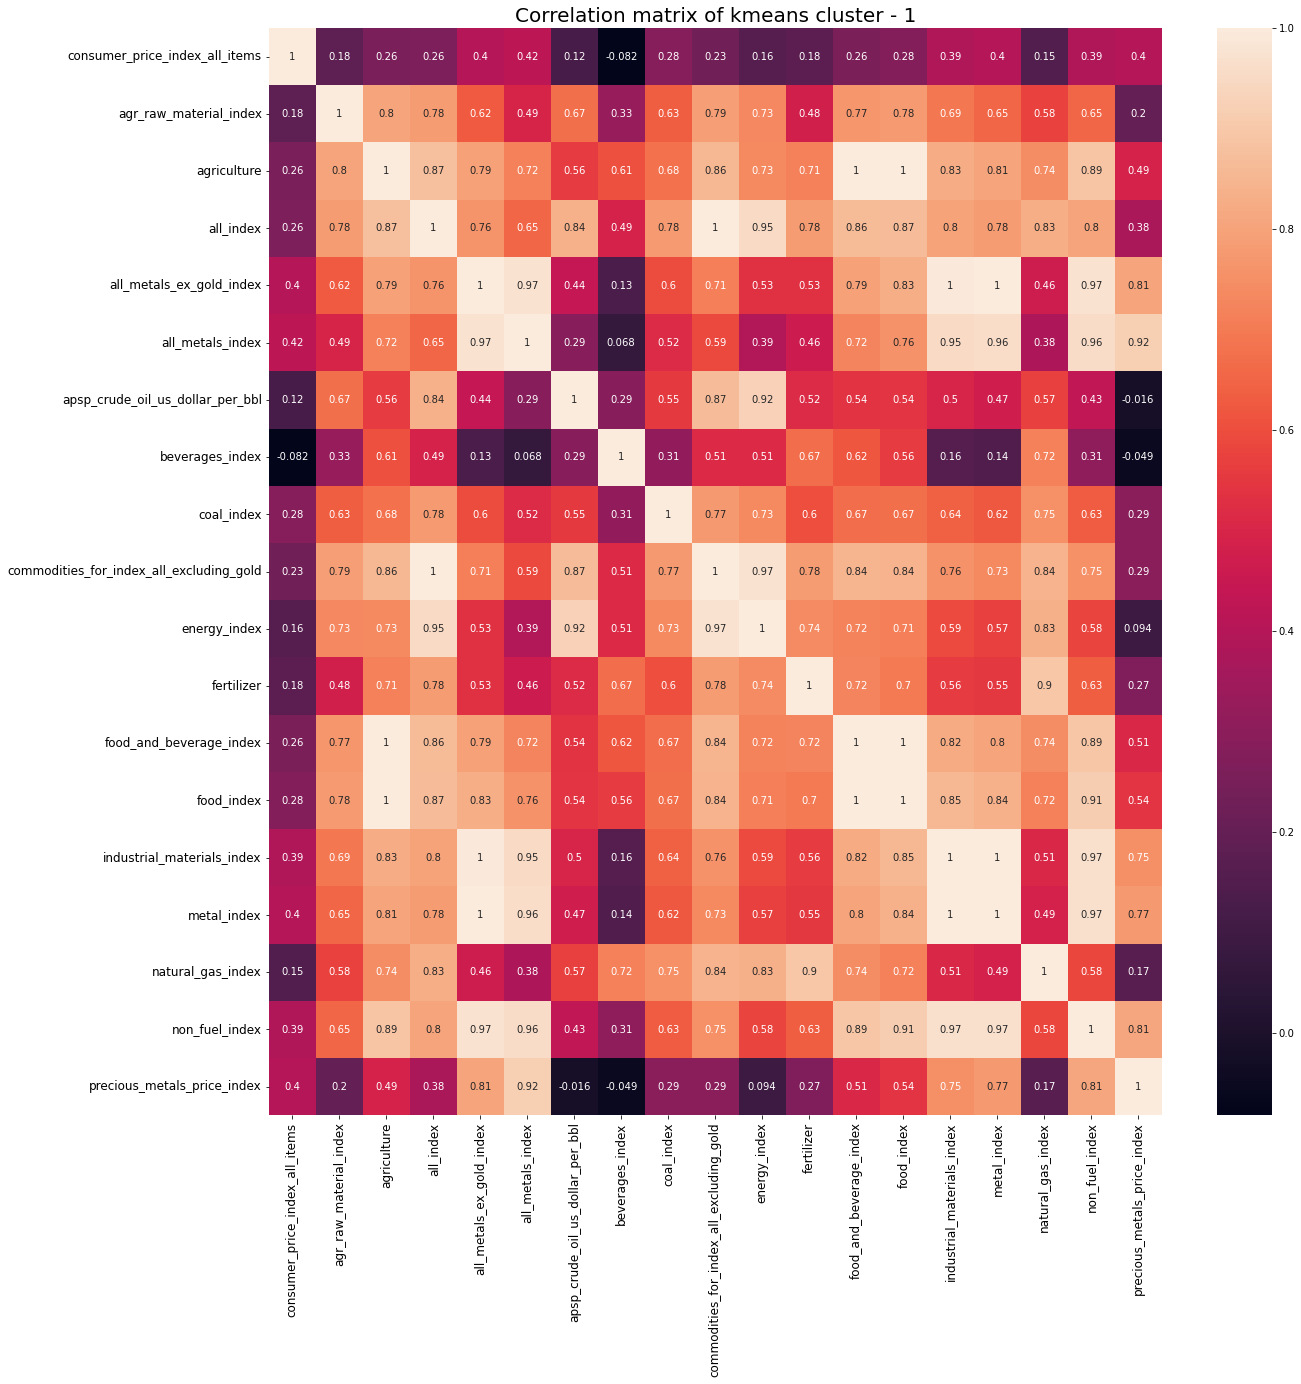

In [55]:
# visualizing correlation matrix
# correlation heatmap with seaborn
f,ax = plt.subplots(figsize = (20,20))
corr = sns.heatmap(df_cluster_1.iloc[:, 4:23].corr(), annot = True, annot_kws = {'size' : 10}, ax = ax)
ax.tick_params(labelsize = 12)
plt.title('Correlation matrix of kmeans cluster - 1', fontsize = 20)
plt.savefig(os.path.join(path, '4. Analysis', 'Correlation matrix Kmeans cluster 1.png'), bbox_inch = 'tight')

### Redefining hypothesis based on new correlation matrix for kmeans_cluster - 1
New hypotheis: __If 'agr_raw_material_index' rises then 'consumer_price_index_all_items' also rises__

### Reshaping the variables as numpy arrays

In [56]:
# reshaping the variables to numpy arrays
x = df_cluster_1.loc[:, 'consumer_price_index_all_items'].values.reshape(-1,1)
y = df_cluster_1.loc[:, 'agr_raw_material_index'].values.reshape(-1,1)

In [57]:
# checking the x object
x

array([[ 89.82958146],
       [ 90.10494848],
       [ 90.20033333],
       ...,
       [102.71021684],
       [102.79492515],
       [102.73597081]])

In [58]:
# checking the y object
y

array([[109.34420135],
       [106.78299698],
       [104.88336522],
       ...,
       [108.46256715],
       [112.8290243 ],
       [114.13314778]])

### Splitting the data in split and train sets

In [59]:
# splitting the data in split and train sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

### Regression analysis

In [60]:
# creating regression object
regression = LinearRegression()

In [61]:
# fittin the regression object to the train set
regression.fit(x_train, y_train)

LinearRegression()

In [62]:
# predicting values of y based on x
y_predicted = regression.predict(x_test)

C:\Users\khand\AppData\Local\Temp\ipykernel_2800\1552307430.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inch" which is no longer supported as of 3.3 and will become an error in 3.6
  plot_test.savefig(os.path.join(path, '4. Analysis', 'Linear regression kmeans cluster 1.png'), bbox_inch = 'tight')


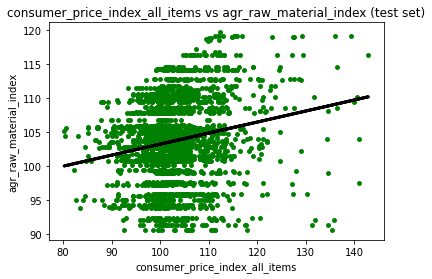

In [63]:
# creating a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(x_test, y_test, color = 'green', s = 15)
plot_test.plot(x_test, y_predicted, color = 'black', linewidth = 3)
plot_test.title('consumer_price_index_all_items vs agr_raw_material_index (test set)')
plot_test.xlabel('consumer_price_index_all_items')
plot_test.ylabel('agr_raw_material_index')
plot_test.savefig(os.path.join(path, '4. Analysis', 'Linear regression kmeans cluster 1.png'), bbox_inch = 'tight')
plot_test.show()

In [77]:
# creating an object that contains model's summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing model's summary statistics
print('Slope: ', regression.coef_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[0.16248639]]
Root mean squared error:  35.85527173631255
R2 score:  0.026980752754029225


In [73]:
# checking the variance in the x test set
x_test.std()

7.094851088056764

In [74]:
# checking the variance in the y test set
y_test.std()

6.070378814931994

#### Comparing the actual and predicted values of y

In [78]:
# creating a datframe comparing the actual and predicted values of y
comparison_data = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_predicted.flatten()})
comparison_data.head(50)

,Actual,Predicted
0,102.592243,103.042506
1,105.409046,103.697326
2,94.191101,103.835063
3,111.521066,104.719365
4,103.146718,104.127915
5,105.561261,103.787214
6,103.449720,103.852319
7,102.592243,102.917391
8,99.371951,104.047248
9,114.133148,104.899725


### Interpreting the results of the linear regression
- The slope of 0.162 represents that when the variable 'agr_raw_material_index' rises a lot, the variable 'consumer_price_index_all_items' rises a little<br>
- The Root mean squared error represents the average distance of all the data points from the regression line. Compared to the standard deviation of the variables the RMSE value is very high which means this model is not well fitted for the dataset
- The R2 score is 0.027 which is less than 0.05 meaning that the regression coefficient is valid at a confidence level of 95%. __Therefore the null hypothesis is rejected and the alternate hypotheis is proven.__


## Future analysis

Considering the insights gained from the kmeans clustering, the follwing are the things to look in to in future:
- We can explore the correlations of oveall CPI ('consumer_price_index_all_items') with lagged variables drrived from global commpdity prices of agricultural raw materials ('agr_raw_material_index')<br>
- We can explore the correlations overall CPI ('consumer_price_index_all_items') with the price indexes of other global commodites<br>
- We can explore country wise correlation between overall CPI and global commodity prices to see if there is any reliable correlation between overall CPI and global price of any commodity.

## Exporting the flagged dataframe

In [23]:
# Exportng the dataframes
df_cpi_pcps_without_outliers.to_csv(os.path.join(path, '2. Data', 'Prepared Data', 'cpi_pcps_merged_kmeans_flagged_csv.csv'), index = None)
df_cpi_pcps_without_outliers.to_pickle(os.path.join(path, '2. Data', 'Prepared Data', 'cpi_pcps_merged_kmeans_flagged_pkl.pkl'))